In [3]:
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance


In [4]:
def load_and_scale_data(x_path, y_path):
    """
    Load and scale feature and target data from specified paths.

    Parameters:
        x_path (str): Path to the CSV file containing feature data.
        y_path (str): Path to the CSV file containing target data.

    Returns:
        np.ndarray, pd.DataFrame: Scaled feature data and target data.
    """
    X = pd.read_csv(x_path)
    X_scaled = StandardScaler().fit_transform(X)
    y = pd.read_csv(y_path)
    return X_scaled, y

def split_data(X, y, test_size=0.25):
    """
    Split data into training and testing sets.

    Parameters:
        X (np.ndarray): Feature data.
        y (pd.DataFrame): Target data.
        test_size (float): Proportion of dataset to include in the test split.

    Returns:
        np.ndarray, np.ndarray, pd.DataFrame, pd.DataFrame: Training and testing data for features and target.
    """
    return train_test_split(X, y, test_size=test_size)

def train_classifier(X_train, y_train, solver='adam', alpha=0.001, hidden_layer_sizes=(16, 2), random_state=1):
    """
    Train a Multi-Layer Perceptron classifier and return the model.

    Parameters:
        X_train (np.ndarray): Training feature data.
        y_train (pd.DataFrame): Training target data.
        solver (str): Solver for weight optimization.
        alpha (float): L2 penalty parameter.
        hidden_layer_sizes (tuple): The ith element represents the number of neurons in the ith hidden layer.
        random_state (int): Determines random number generation for weights and bias initialization.

    Returns:
        MLPClassifier: Trained classifier.
    """
    clf = MLPClassifier(solver=solver, alpha=alpha, hidden_layer_sizes=hidden_layer_sizes, random_state=random_state)
    clf.fit(X_train, y_train.values.ravel())
    return clf

def evaluate_and_display_importance(clf, X_test, y_test, feature_names):
    """
    Evaluate classifier, display accuracy and plot feature importances.

    Parameters:
        clf (MLPClassifier): Trained classifier.
        X_test (np.ndarray): Testing feature data.
        y_test (pd.DataFrame): Testing target data.
        feature_names (list): Names of the feature columns.
    """
    print("Accuracy:", clf.score(X_test, y_test))
    
    result = permutation_importance(clf, X_test, y_test.values.ravel(), n_repeats=50, random_state=0)

    feature_importance = pd.DataFrame({'Feature': feature_names,
                                       'Importance': result.importances_mean})
    feature_importance['Importance'] = feature_importance['Importance']*100
    feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
    feature_importance['Importance'] = feature_importance['Importance'].apply(lambda x: '{:.6f}%'.format(x))
    print(feature_importance)

    imp = pd.Series(result.importances_mean*100, index=feature_names).sort_values(ascending=True)
    ax = imp.plot.barh()
    ax.set_title("MLP Permutation Importance")
    ax.figure.tight_layout()
    plt.xlabel('Importance (%)')
    plt.grid(axis='x', linestyle='--', alpha=0.6)
    plt.ylabel('Feature')
    for i, v in enumerate(imp):
        ax.text(v, i, f"{v:.1f}", color='blue', fontweight='bold', fontsize=8)
    plt.show()



Accuracy: 0.9999468419796481
     Feature  Importance
1     Mag_AS  35.750235%
3     DRC180  27.303263%
11  Pseu_Grv  25.969288%
9   mag_Ydrv  22.786641%
5      DRC90  22.534069%
18     Em_Qd  19.747638%
7      HDTDR  17.318675%
19   EM_Inph  17.076689%
17  EM_Ap_rs  16.363408%
6     Mag_TD  14.967083%
8   Mag_Xdrv  14.550342%
10  Mag_Zdrv  14.373907%
4      DRC45  13.481301%
2     DRC135  10.828382%
0    Mag_TMI   8.320356%
16  EM_ratio   0.012758%
13     Rd_TC   0.004268%
14     Rd_Th   0.004042%
12      Rd_U   0.004001%
15      Rd_K   0.003975%


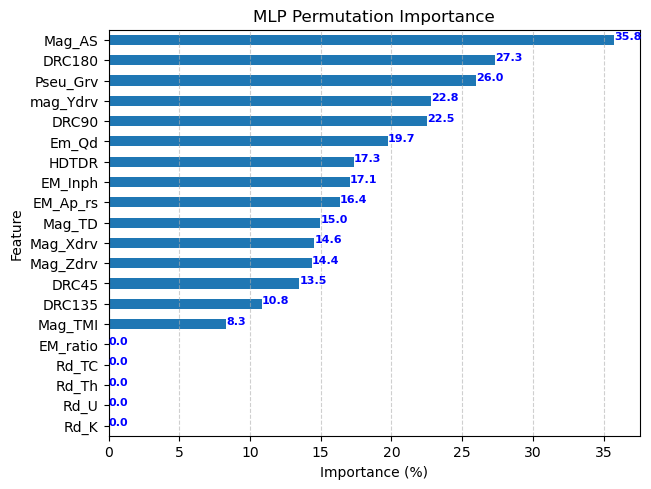

In [5]:
# Example usage:
feature_names = ["Mag_TMI","Mag_AS","DRC135","DRC180","DRC45","DRC90","Mag_TD","HDTDR","Mag_Xdrv","mag_Ydrv",
                 "Mag_Zdrv","Pseu_Grv","Rd_U","Rd_TC","Rd_Th","Rd_K","EM_ratio","EM_Ap_rs","Em_Qd","EM_Inph"]

X, y = load_and_scale_data('/home/dipak/Desktop/Wine_datasets/X_res.csv', '/home/dipak/Desktop/Wine_datasets/y_res.csv')
X_train, X_test, y_train, y_test = split_data(X, y, test_size=0.25)
clf = train_classifier(X_train, y_train)
evaluate_and_display_importance(clf, X_test, y_test, feature_names)